# Project Work
This project is composed from two dataset:
- Lipidoma
- Metaboloma

The aim of this project is identify bio-markers that allow to distinguish the evolution of pathology (HCV). We have 3 several class of patient:
- LC: Hepatocellular carcinoma
- HC: Hepatitis C virus
- MC: Mixed Cryoglobulinemia disease

## Lipidoma

### Read data set 
On the raw we have the features, while on the column we have the samples.

However, I set the features on the column and the samples on the raw.

In [64]:
import pandas as pd
import numpy as np

data_lipidoma_transpose = pd.read_excel("DataSet PAscale/Lipidoma.xlsx")

data_lipidoma = data_lipidoma_transpose.T
data_lipidoma.columns = data_lipidoma_transpose["Name"]
data_lipidoma = data_lipidoma.iloc[1:]
data_lipidoma.columns = ["Label"] + list(data_lipidoma.columns[1:])

df_y_lipidoma = data_lipidoma["Label"].iloc[8:]
df_y_qc_lipidoma = data_lipidoma["Label"].iloc[1:8]
df_x_lipidoma = data_lipidoma.iloc[8:,1:]
df_qc_lipidoma = df_x_lipidoma.iloc[1:8]

name_samples_lipidoma = df_x_lipidoma.transpose().columns

#### View the data
I made a scatter plot with M/Z on the x-axis and intensity on y-axis.

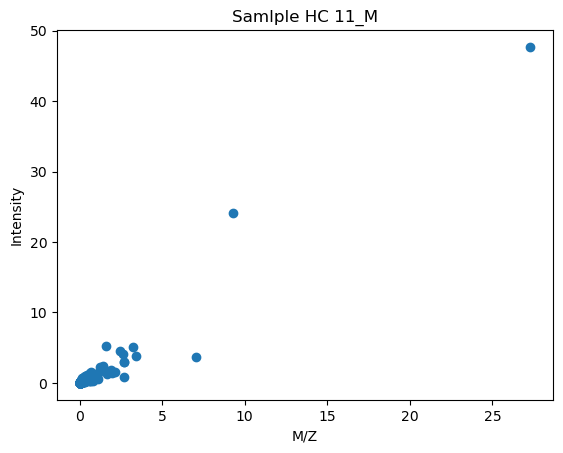

HC 19_M    47.706735
dtype: object

In [65]:
import matplotlib.pyplot as plt

plt.scatter(df_x_lipidoma.iloc[0:1], df_x_lipidoma.iloc[97:98])
plt.xlabel("M/Z")
plt.ylabel("Intensity")
plt.title("Samlple HC 11_M")
plt.show()
# axis=1 sono le righe; axis=0 sono le colonne
df_x_lipidoma[97:98].max(axis=1)


### Fill the gap

In [66]:
print(df_x_lipidoma.isna().sum().sort_values(ascending=False))

LPC 20:0           15
LPC 19:0           15
LPC O-18:1_B       14
SM 14:0;2O/16:1    14
PC 19:0_18:2       13
                   ..
PC 18:1_18:1        0
PC 18:1_22:6        0
PC 18:2_18:2_A      0
PC 18:2_18:2_B      0
PC O-16:1_18:1      0
Length: 226, dtype: int64


In [67]:
df_x_lipidoma_original = df_x_lipidoma.copy()
for column in df_x_lipidoma.columns:
    df_x_lipidoma.loc[:,column] = df_x_lipidoma[column].fillna((np.nanmin(df_x_lipidoma[column]))/5)
print(df_x_lipidoma.isna().sum().sort_values(ascending=False))

CE 16:0                0
SM 18:2;2O/16:0        0
PE 18:0_18:1           0
PE 18:0_18:2           0
PE 18:2_18:0           0
                      ..
PC 16:1_18:2_B         0
PC 17:0_16:2           0
PC 17:0_17:0           0
PC 17:0_18:1           0
TG O-18:1_16:0_18:1    0
Length: 226, dtype: int64


### TIC Normalization with Sum

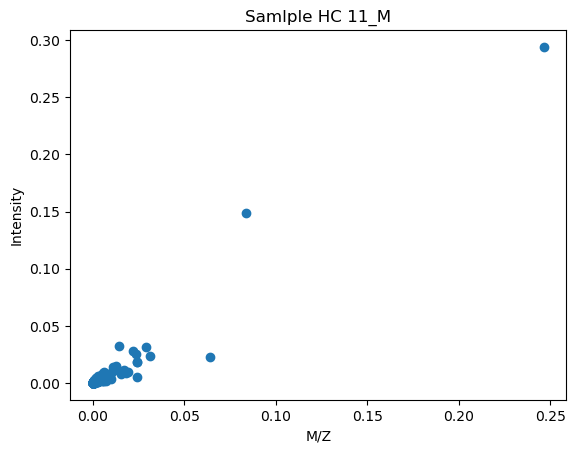

HC 19_M    0.294122
dtype: object

In [68]:
tic = df_x_lipidoma.sum(axis=1)
df_x_lipidoma_tic = df_x_lipidoma.div(tic,axis=0)

plt.scatter(df_x_lipidoma_tic.iloc[0:1], df_x_lipidoma_tic.iloc[97:98])
plt.xlabel("M/Z")
plt.ylabel("Intensity")
plt.title("Samlple HC 11_M")
plt.show()
# axis=1 sono le righe; axis=0 sono le colonne
df_x_lipidoma_tic[97:98].max(axis=1)

#### Scaled Data

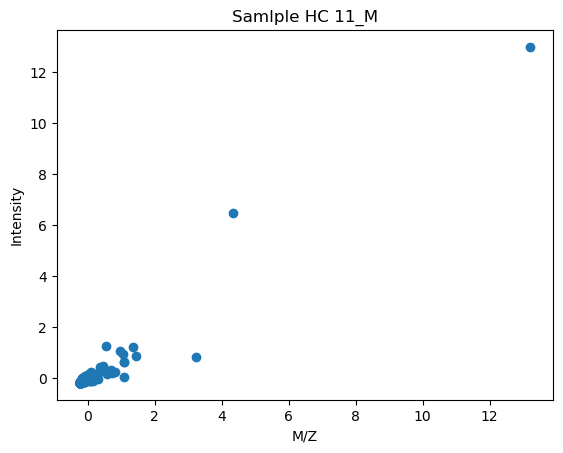

HC 19_M    13.000719
dtype: object

In [69]:
mean_x_tic_sum = df_x_lipidoma_tic.mean(axis=1)
std_x_tic_sum = df_x_lipidoma_tic.std(axis=1)
df_x_lipidoma_tic_scaled = (df_x_lipidoma_tic.sub(mean_x_tic_sum,axis=0)).div(std_x_tic_sum,axis=0)

plt.scatter(df_x_lipidoma_tic_scaled.iloc[0:1], df_x_lipidoma_tic_scaled.iloc[97:98])
plt.xlabel("M/Z")
plt.ylabel("Intensity")
plt.title("Samlple HC 11_M")
plt.show()

df_x_lipidoma_tic_scaled[97:98].max(axis=1)

#### PCA

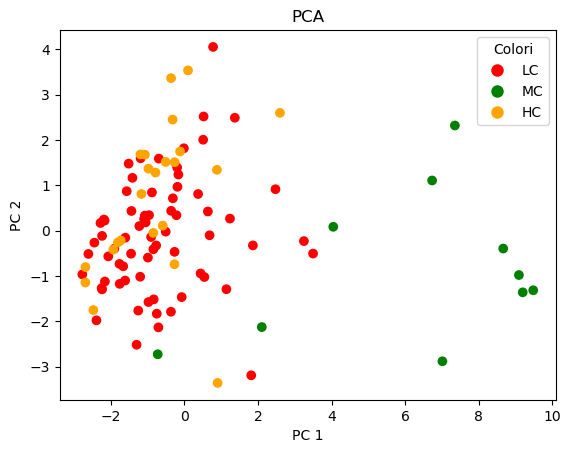

[0.59610145 0.18286703]


In [70]:
from sklearn.decomposition import PCA

pca_tic = PCA(n_components=2)
df_x_lipidoma_tic_scaled_pca = pca_tic.fit(df_x_lipidoma_tic_scaled).transform(df_x_lipidoma_tic_scaled)

color_mapping = {
    'LC': 'red',
    'MC': 'green',
    'HC' : 'orange'
}

colors = [color_mapping[label] for label in df_y_lipidoma]

plt.legend(handles=[
    plt.Line2D([0], [0], marker='o', color='w', label='LC', markerfacecolor='red', markersize=10),
    plt.Line2D([0], [0], marker='o', color='w', label='MC', markerfacecolor='green', markersize=10),
    plt.Line2D([0], [0], marker='o', color='w', label='HC', markerfacecolor='orange', markersize=10)
], title='Colori')

plt.scatter(df_x_lipidoma_tic_scaled_pca[:, 0], df_x_lipidoma_tic_scaled_pca[:, 1], c=colors)
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.title('PCA')
plt.show()

print(pca_tic.explained_variance_ratio_)

##### Print most important features by loadings

In [71]:
loadings_tic = pca_tic.components_

important_features_tic = [i for i, loading in enumerate(loadings_tic[0]) if abs(loading) > 0.22]

print(df_x_lipidoma_tic_scaled.columns[important_features_tic])

Index(['CE 18:2', 'LPC 16:0', 'PI 38:4', 'TG 16:0_18:1_18:1'], dtype='object')


#### LDA

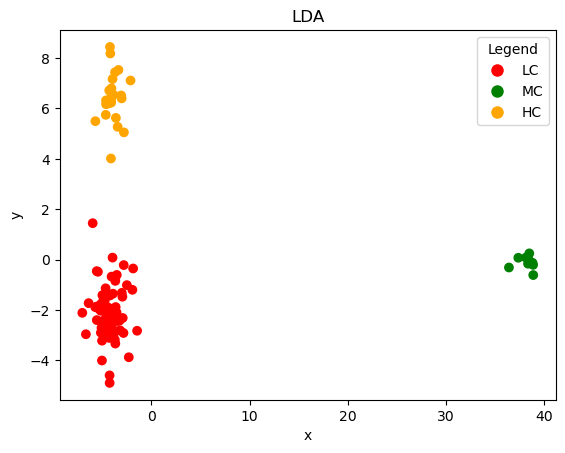

In [72]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

lda_tic = LDA(n_components=2)
df_x_lipidoma_tic_scaled_lda = lda_tic.fit(df_x_lipidoma_tic_scaled,df_y_lipidoma).transform(df_x_lipidoma_tic_scaled)

color_mapping = {
    'LC': 'red',
    'MC': 'green',
    'HC' : 'orange'
}

colors = [color_mapping[label] for label in df_y_lipidoma]

plt.scatter(df_x_lipidoma_tic_scaled_lda[:, 0], df_x_lipidoma_tic_scaled_lda[:, 1], c=colors)
plt.xlabel('x')
plt.ylabel('y')
plt.legend(handles=[
    plt.Line2D([0], [0], marker='o', color='w', label='LC', markerfacecolor='red', markersize=10),
    plt.Line2D([0], [0], marker='o', color='w', label='MC', markerfacecolor='green', markersize=10),
    plt.Line2D([0], [0], marker='o', color='w', label='HC', markerfacecolor='orange', markersize=10)
], title='Legend')
plt.title('LDA')
plt.show()

### MAD - normalization

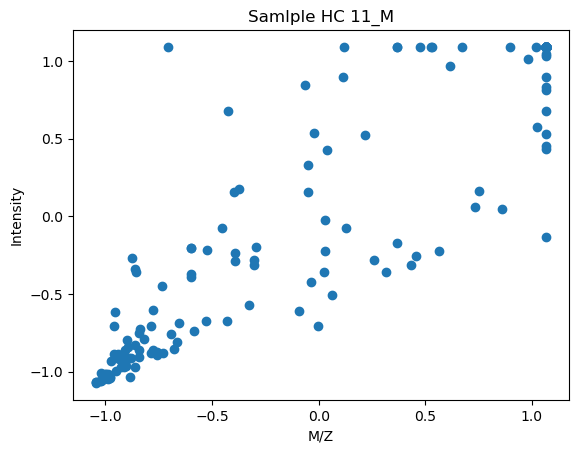

HC 19_M    1.090302
dtype: object

In [73]:
# provo con la mediana
tic_median = df_x_lipidoma.median(axis=1)
# print(tic_median)
df_x_lipidoma_mad_median_temp = (df_x_lipidoma.sub(tic_median,axis=0)).abs()
# print(df_x_lipidoma_tic_median_temp)
df_x_lipidoma_mad_median_temp_median = df_x_lipidoma_mad_median_temp.median(axis=1)
# print(df_x_lipidoma_tic_median_temp_mad)
df_x_lipidoma_MAD = (df_x_lipidoma.sub(df_x_lipidoma_mad_median_temp,axis=0)).div(df_x_lipidoma_mad_median_temp_median,axis=0)
df_x_lipidoma_MAD

plt.scatter(df_x_lipidoma_MAD.iloc[0:1], df_x_lipidoma_MAD.iloc[97:98])
plt.xlabel("M/Z")
plt.ylabel("Intensity")
plt.title("Samlple HC 11_M")
plt.show()
# axis=1 sono le righe; axis=0 sono le colonne
df_x_lipidoma_MAD[97:98].max(axis=1)

#### Scaled data

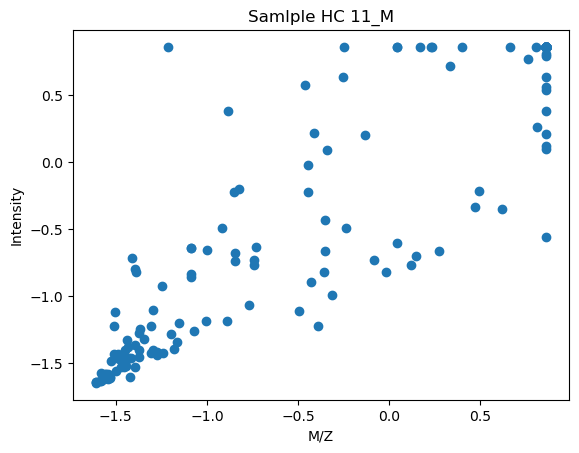

HC 19_M    0.857556
dtype: object

In [74]:
# # ogni campione - media
mean_x_mad = df_x_lipidoma_MAD.mean(axis=1)
std_x_mad = df_x_lipidoma_MAD.std(axis=1)

df_x_lipidoma_MAD_scaled = (df_x_lipidoma_MAD.sub(mean_x_mad,axis=0)).div(std_x_mad,axis=0)

plt.scatter(df_x_lipidoma_MAD_scaled.iloc[0:1], df_x_lipidoma_MAD_scaled.iloc[97:98])
plt.xlabel("M/Z")
plt.ylabel("Intensity")
plt.title("Samlple HC 11_M")
plt.show()

df_x_lipidoma_MAD_scaled[97:98].max(axis=1)

#### PCA

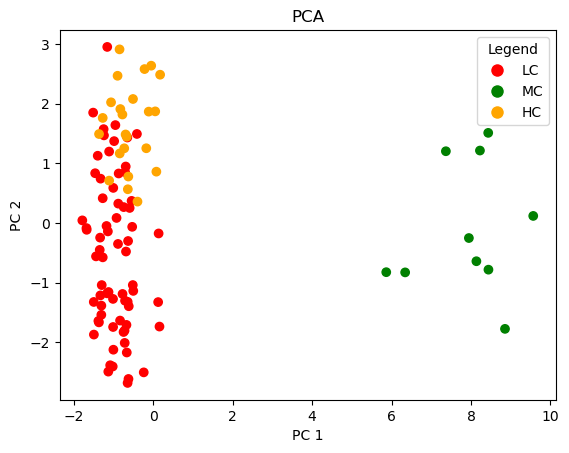

[0.36228345 0.1102676 ]
-6.580432964811403


array([2.91189278])

In [75]:
from sklearn.decomposition import PCA

pca_mad = PCA(n_components=2)
df_x_lipidoma_MAD_scaled_pca = pca_mad.fit(df_x_lipidoma_MAD_scaled).transform(df_x_lipidoma_MAD_scaled)

color_mapping = {
    'LC': 'red',
    'MC': 'green',
    'HC' : 'orange'
}

colors = [color_mapping[label] for label in df_y_lipidoma]

plt.scatter(df_x_lipidoma_MAD_scaled_pca[:, 0], df_x_lipidoma_MAD_scaled_pca[:, 1], c=colors)
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.legend(handles=[
    plt.Line2D([0], [0], marker='o', color='w', label='LC', markerfacecolor='red', markersize=10),
    plt.Line2D([0], [0], marker='o', color='w', label='MC', markerfacecolor='green', markersize=10),
    plt.Line2D([0], [0], marker='o', color='w', label='HC', markerfacecolor='orange', markersize=10)
], title='Legend')
plt.title('PCA')
plt.show()

print(pca_mad.explained_variance_ratio_)
print(pca_mad.score(df_x_lipidoma_MAD_scaled))

df_x_lipidoma_MAD_scaled_pca[97:98].max(axis=1)

##### Print important features by loadings

In [76]:
loadings_mad = pca_mad.components_

important_features_mad = [i for i, loading in enumerate(loadings_mad[0]) if abs(loading) > 0.22]

print(df_x_lipidoma_MAD_scaled.columns[important_features_mad])

Index(['LPC O-18:0', 'LPC O-18:1_B', 'LPC O-24:1', 'PC 18:1_22:6',
       'TG 18:1_18:2_20:4'],
      dtype='object')


##### Q-residual

In [77]:
original_data_reconstructed_mad = pca_mad.inverse_transform(df_x_lipidoma_MAD_scaled_pca)

q_residual = np.sum((df_x_lipidoma_MAD_scaled - original_data_reconstructed_mad) ** 2, axis=1)

q_residual

LC 203_M     10.123614
LC 235a_M     7.710186
LC 235b_M     5.220287
LC 237_M     12.786071
LC 241a_M     6.541919
               ...    
HC 19_M       5.900008
HC 21_M      16.466338
HC 22_M      13.555367
HC 20_M       6.220132
HC 23_M       4.460109
Length: 102, dtype: object

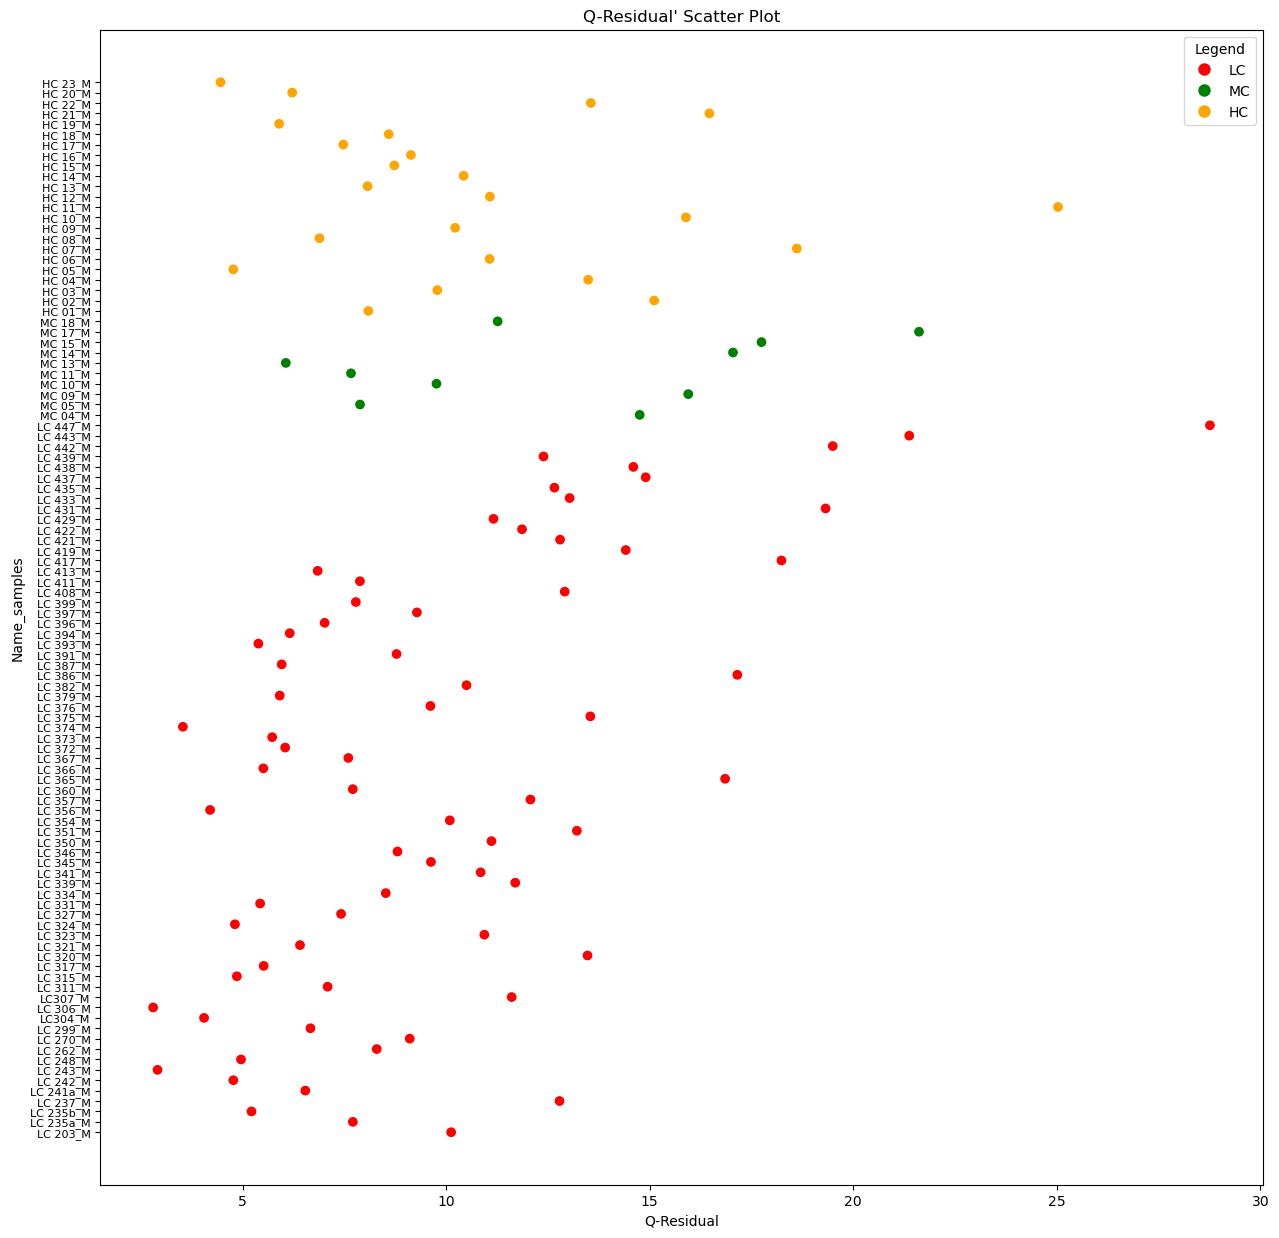

In [78]:
color_mapping = {
    'LC': 'red',
    'MC': 'green',
    'HC' : 'orange'
}

colors = [color_mapping[label] for label in df_y_lipidoma]
plt.figure(figsize=(15, 15))
plt.scatter(q_residual, name_samples_lipidoma, c=colors)
plt.xlabel('Q-Residual')
plt.ylabel('Name_samples')
plt.yticks(fontsize=8)
plt.legend(handles=[
    plt.Line2D([0], [0], marker='o', color='w', label='LC', markerfacecolor='red', markersize=10),
    plt.Line2D([0], [0], marker='o', color='w', label='MC', markerfacecolor='green', markersize=10),
    plt.Line2D([0], [0], marker='o', color='w', label='HC', markerfacecolor='orange', markersize=10)
], title='Legend')
plt.title("Q-Residual' Scatter Plot")
plt.show()

#### LDA

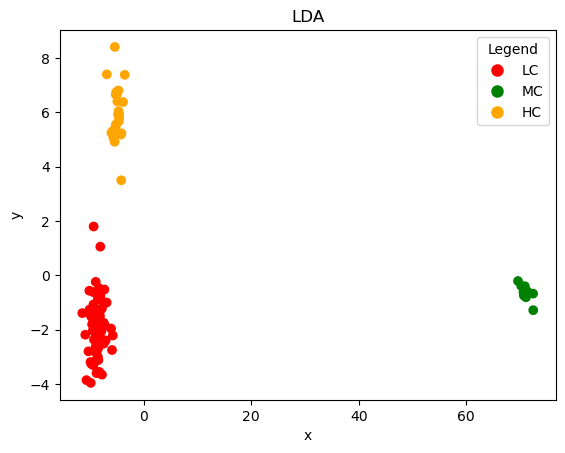

In [79]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

lda_mad = LDA(n_components=2)
df_x_lipidoma_MAD_scaled_lda = lda_mad.fit(df_x_lipidoma_MAD_scaled,df_y_lipidoma).transform(df_x_lipidoma_MAD_scaled)

color_mapping = {
    'LC': 'red',
    'MC': 'green',
    'HC' : 'orange'
}

colors = [color_mapping[label] for label in df_y_lipidoma]

plt.scatter(df_x_lipidoma_MAD_scaled_lda[:, 0], df_x_lipidoma_MAD_scaled_lda[:, 1], c=colors)
plt.xlabel('x')
plt.ylabel('y')
plt.legend(handles=[
    plt.Line2D([0], [0], marker='o', color='w', label='LC', markerfacecolor='red', markersize=10),
    plt.Line2D([0], [0], marker='o', color='w', label='MC', markerfacecolor='green', markersize=10),
    plt.Line2D([0], [0], marker='o', color='w', label='HC', markerfacecolor='orange', markersize=10)
], title='Legend')
plt.title('LDA')
plt.show()